# Présentation des données utilisées dans l'article

### Importation des modules customs

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) +'\\analyser_tools'
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from EmailDataFrame import *

C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\analyser_tools


### Modules python

In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import seaborn as sns
import matplotlib.dates as mdates
from tqdm import tqdm
from copy import deepcopy
%matplotlib inline

### Path

In [3]:
cwd = pathlib.PurePath(os.getcwd())
project_root_dir = cwd.parent
theme_path = project_root_dir / "data" / "theme_words.csv"
email_raw_path = project_root_dir / "output" / 'csv_file' / 'email_raw.csv'
facebook_url_info_path = project_root_dir / 'output' / 'csv_file' / 'facebook_urls_info.csv'
youtube_url_info_path = project_root_dir / 'output' / 'csv_file' / 'youtube_urls_info.csv'
log_file_path = project_root_dir / 'output' / 'log_file' / 'url_cleaning.log'
removed_email_path = project_root_dir / 'output' / 'csv_file' / 'removed_email_from_decrypteur.csv'

dataclean_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean'
dataclean_all_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_all'
dataclean_pre_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_pre'

corpus_em_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_em'
corpus_day_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_day'
dtm_em_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_em'
dtm_day_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_day'

output_path_graph_folder = project_root_dir / 'output' / 'graph_png'
output_path_csv_graph = project_root_dir / 'output' / 'csv_for_graph'
path_google_trends = project_root_dir / 'data' / 'google trends' /'tous_les_mots.csv'

### convertisseur de données à l'ouverture de csv pour les list-like objects

In [4]:
fb_yt_converter = {'theme': lambda x: x.strip("[]").replace("'", "").strip().split(', ')}
email_raw_converters = {"attach_type": lambda x: x.strip("[]").replace("'", "").lower().strip().split(", "),
                        "urls": lambda x: x.strip("[]").replace("'", "").strip().split(', ')
                        }

### Lire les données traiteés dans le notebook 2

In [5]:
#Load from pickle si aucune nouvelle modification 

#email
EmailDfBaseClass.read_dict_theme_from_csv(theme_path)
email_raw = EmailDF.from_csv(email_raw_path)
email_df = EmailDF.from_pickle(dataclean_pickle_path)
email_df_pre = EmailDF.from_pickle(dataclean_pre_pickle_path)
email_df_all = EmailDF.from_pickle(dataclean_all_pickle_path)


#URLS
fb_url = UrlDF.from_csv(facebook_url_info_path, parse_dates=None, converters=fb_yt_converter)
yt_url = UrlDF.from_csv(youtube_url_info_path, parse_dates=None, converters=fb_yt_converter)

#LOAD CORPUS AND DTM
corpus_em = EmailCorpus.from_pickle(corpus_em_path)
corpus_day = EmailCorpus.from_pickle(corpus_day_path)
dtm_em = EmailDTM.from_pickle(dtm_em_path)
dtm_day = EmailDTM.from_pickle(dtm_day_path)

loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_pre
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_all
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_day
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_day


# Data pour Graphique datawrapper

## Line plot email par jour

In [6]:
email_df.email_per_day.to_csv(output_path_csv_graph/'email_per_day.csv')

## Scatter plot email per theme per day with proportion as dot size

In [7]:
col_to_output = ['reseaux_sociaux', 'virus', 'traitement', 'masque', '5g', 'bilan', 'complot', 'experts', 'politique', 'laboratoire', 'qanon', 'entourage', 'chine']

In [8]:
email_df.theme_per_day(pourc=True)[col_to_output].stack().reset_index().head()

,datetime,level_1,0
0,2020-03-01,reseaux_sociaux,33.333333
1,2020-03-01,virus,66.666667
2,2020-03-01,traitement,33.333333
3,2020-03-01,masque,0.000000
4,2020-03-01,5g,0.000000


### theme per day count

In [9]:
email_df.theme_per_day(pourc=False)[col_to_output].stack().reset_index().head()

,datetime,level_1,0
0,2020-03-01,reseaux_sociaux,1
1,2020-03-01,virus,2
2,2020-03-01,traitement,1
3,2020-03-01,masque,0
4,2020-03-01,5g,0


### Label formatting for datawrapper

In [10]:
theme_name = {'reseaux_sociaux' : 'réseaux sociaux',
             'virus' : 'virus',
             'traitement': 'traitement',
             'masque': 'masque',
             'bilan': 'bilan',
              'complot': 'complot',
              'experts': 'expert',
              '5g' : '5G',
              'politique': 'politique',
              'regions': 'régions',
              'europe':'Europe',
              'usa':'États-Unis',
              'chine': 'Chine',
              'reste_du_monde': 'reste du monde',
              'entourage' : 'entourage',
              'laboratoire' : 'laboratoire',
              'qanon' : 'QAnon'
             }

In [11]:
def create_label_col(date, count, prop, lbDW):
    label = []
    for d,c,p in zip(date, count, prop) :
        year, month, day = d.year, d.month, d.day
        lb = lbDW.format(year, month, day, prop)
        

### concat

In [12]:
data= email_df.theme_per_day(pourc=False)[col_to_output].stack().reset_index()
prop = email_df.theme_per_day(pourc=True)[col_to_output].stack().reset_index()
data['prop'] = prop[0].round(2)
data[0] = data[0].replace(0,np.nan)
data['prop'] = data['prop'].replace(0,np.nan)
for k in theme_name.keys():
    if k in data['level_1'].values:
        data['level_1'] = data['level_1'].replace(k, theme_name[k])             
data.columns = ['Date', 'Thème', 'Nombre de courriels', 'Proportion par jour']

data.to_csv(output_path_csv_graph/'theme_per_day_count_prop_tout.csv', index = False)

### même données, mais seulement pour virus - chine - laboratoire

In [13]:
col_v_c_l = ['virus', 'chine', 'laboratoire']

In [14]:
data= email_df.theme_per_day(pourc=False)[col_v_c_l].stack().reset_index()
prop = email_df.theme_per_day(pourc=True)[col_v_c_l].stack().reset_index()
data['prop'] = prop[0].round(2)
data[0] = data[0].replace(0,np.nan)
data['prop'] = data['prop'].replace(0,np.nan)
for k in theme_name.keys():
    if k in data['level_1'].values:
        data['level_1'] = data['level_1'].replace(k, theme_name[k])

data.columns = ['Date', 'Thème', 'Nombre de courriels', 'Proportion par jour']

data.to_csv(output_path_csv_graph/'theme_per_day_count_prop_virus_chine_labo.csv', index = False)

In [15]:
data

,Date,Thème,Nombre de courriels,Proportion par jour
0,2020-03-01,virus,2.0,66.67
1,2020-03-01,Chine,1.0,33.33
2,2020-03-01,laboratoire,1.0,33.33
3,2020-03-02,virus,2.0,33.33
4,2020-03-02,Chine,3.0,50.00
...,...,...,...,...
547,2020-08-30,Chine,NaN,NaN
548,2020-08-30,laboratoire,NaN,NaN
549,2020-08-31,virus,3.0,75.00
550,2020-08-31,Chine,NaN,NaN


### même données, mais seulement pour complot - bilan - qanon

In [16]:
col_c_b_q = ['complot', 'bilan', 'qanon']

In [17]:
data= email_df.theme_per_day(pourc=False)[col_c_b_q].stack().reset_index()
prop = email_df.theme_per_day(pourc=True)[col_c_b_q].stack().reset_index()
data['prop'] = prop[0].round(2)
data[0] = data[0].replace(0,np.nan)
data['prop'] = data['prop'].replace(0,np.nan)
for k in theme_name.keys():
    if k in data['level_1'].values:
        data['level_1'] = data['level_1'].replace(k, theme_name[k])             
data.columns = ['Date', 'Thème', 'Nombre de courriels', 'Proportion par jour']

data.to_csv(output_path_csv_graph/'theme_per_day_count_prop_complot_bilan_qanon.csv', index = False)

### même données, mais seulement pour  5G - Masque

In [18]:
col_5g_m = ['5g', 'masque']

In [19]:
data= email_df.theme_per_day(pourc=False)[col_5g_m].stack().reset_index()
prop = email_df.theme_per_day(pourc=True)[col_5g_m].stack().reset_index()
data['prop'] = prop[0].round(2)
data[0] = data[0].replace(0,np.nan)
data['prop'] = data['prop'].replace(0,np.nan)
for k in theme_name.keys():
    if k in data['level_1'].values:
        data['level_1'] = data['level_1'].replace(k, theme_name[k])             
data.columns = ['Date', 'Thème', 'Nombre de courriels', 'Proportion par jour']

data.to_csv(output_path_csv_graph/'theme_per_day_count_prop_5g_masque.csv', index = False)

### même données, mais seulement pour  entourage - Réseaux sociaux

In [20]:
col_e_rs = ['entourage', 'reseaux_sociaux']

In [21]:
data= email_df.theme_per_day(pourc=False)[col_e_rs].stack().reset_index()
prop = email_df.theme_per_day(pourc=True)[col_e_rs].stack().reset_index()
data['prop'] = prop[0].round(2)
data[0] = data[0].replace(0,np.nan)
data['prop'] = data['prop'].replace(0,np.nan)
for k in theme_name.keys():
    if k in data['level_1'].values:
        data['level_1'] = data['level_1'].replace(k, theme_name[k])             
data.columns = ['Date', 'Thème', 'Nombre de courriels', 'Proportion par jour']

data.to_csv(output_path_csv_graph/'theme_per_day_count_prop_entourage_res_soc.csv', index = False)

### Email per word in theme

In [22]:
email_df.groupby_word_in_theme().to_csv(output_path_csv_graph/'email_per_word_in_theme.csv')

In [23]:
email_df.groupby_theme(prop=False).loc[col_to_output]

reseaux_sociaux    2911
virus              2302
traitement          569
masque              312
5g                  109
bilan               419
complot             566
experts             353
politique           687
laboratoire         142
qanon                36
entourage           735
chine               482
dtype: int64

In [24]:
email_df.theme_per_day(pourc=False)[col_to_output].stack().reset_index()

,datetime,level_1,0
0,2020-03-01,reseaux_sociaux,1
1,2020-03-01,virus,2
2,2020-03-01,traitement,1
3,2020-03-01,masque,0
4,2020-03-01,5g,0
...,...,...,...
2387,2020-08-31,politique,0
2388,2020-08-31,laboratoire,0
2389,2020-08-31,qanon,0
2390,2020-08-31,entourage,0


### OUTPUT DONNEES POUR GRAPHIQUE MENTION URL EN FONCTION DU TEMPS

- video_claude_gelina
- video_pascal_borel
- video_jeremie_mercier
- video_luc_montagnier
- video_radio_quebec


In [61]:
video_claude_gelina = ['https://www.facebook.com/10163730984880501/', 'https://www.youtube.com/watch?v=SuWYueDHdQI', 'https://www.facebook.com/10163425830315501/', 'https://www.facebook.com/10220634658009043/']
video_pascal_borel = ['https://www.youtube.com/watch?v=7t82PZcp-4A', 'https://www.youtube.com/watch?v=66UUTnjVlnk', 'https://www.youtube.com/watch?v=ftycOBl6VuU', 'https://www.youtube.com/watch?v=dL2A1NrIq7I']
video_jeremie_mercier = ['https://www.facebook.com/558891734790545/', 'https://www.youtube.com/watch?v=Fvp6uah-2hY']
video_luc_montagnier = ['https://www.youtube.com/watch?v=l941UaL913c']

video_radio_quebec = ['https://www.youtube.com/watch?v=DH7Ot3DrmX4',
 'https://www.youtube.com/watch?v=AEYHofyP3x4', 'https://www.youtube.com/watch?v=Z5kA6iBpYR4', 'https://www.youtube.com/watch?v=m8HF4GXjsP8', 'https://www.youtube.com/watch?v=012sY5eZ440', 'https://www.youtube.com/watch?v=i_-6b9LNk2A',
 'https://www.youtube.com/watch?v=UvOzDSaf3H8', 'https://www.youtube.com/watch?v=9Wso0nnLpYE', 'https://www.youtube.com/watch?v=Xsnk57CwHxE', 'https://www.youtube.com/watch?v=TzxLZ12kbg8', 'https://www.youtube.com/watch?v=kerm4GgqOSo',
 'https://www.youtube.com/watch?v=qiU13p4YlCA', 'https://www.youtube.com/watch?v=byXCZ_Z-pHM', 'https://www.youtube.com/watch?v=bAaJZOK93Sg', 'https://www.youtube.com/watch?v=hCs33zWPJrk']

video_denis_rancourt = ['https://www.youtube.com/watch?v=H-oBxUE-k0o', 'https://www.facebook.com/4696237033735338/', 'https://www.facebook.com/1170890569958096/', 'https://www.facebook.com/558891734790545/', 'https://www.youtube.com/watch?v=Fvp6uah-2hY']
video_theovox = ['https://www.youtube.com/watch?v=0-TLy7kwYAw', 'https://www.facebook.com/1170890569958096/', 'https://www.facebook.com/4696237033735338/']
video_evrard = ['https://www.youtube.com/watch?v=izzadeWl3b0','https://www.youtube.com/watch?v=VjlDLSemGd0']


url_to_graph = {'claude_gelinas': video_claude_gelina,
                     'pascal_borel' : video_pascal_borel,
                     'jeremie_mercier' : video_jeremie_mercier,
                      'luc_montagnier' : video_luc_montagnier,
                      'radio_quebec' : video_radio_quebec,
                      'video_theovox' : video_theovox,
                      'video_evrard' : video_evrard
                     }
label_names = {'claude_gelinas': 'Claude Gélinas',
             'pascal_borel' : 'Pascal Borel',
             'jeremie_mercier' : 'Jérémie Mercier',
              'luc_montagnier' : 'Luc Montagnier',
              'radio_quebec' : 'Radio-Québec',
              'video_theovox' : 'Théovox',
              'video_evrard' : 'EVRARD'
             }

In [53]:
# email_df.filt('urls', with_values=['https://www.facebook.com/10163730984880501/']).df.set_index('datetime').resample('D').count().email_id.

In [54]:
def get_count_url_that_day(url):
    try:
        count = email_df.filt('urls', with_values=[url]).df.set_index('datetime').resample('D').count().email_id.loc[date]
    except KeyError:
        count = 0
    return count

In [62]:
for keys in label_names:
    url_to_graph_df1.group = url_to_graph_df1.group.replace(keys, label_names[keys])

In [64]:
url_to_graph_df1.head()

,datetime,urls,group,count,email_that_day,prop
0,2020-03-01,https://www.facebook.com/10163730984880501/,Claude Gélinas,NaN,3,NaN
1,2020-03-01,https://www.youtube.com/watch?v=SuWYueDHdQI,Claude Gélinas,NaN,3,NaN
2,2020-03-01,https://www.facebook.com/10163425830315501/,Claude Gélinas,NaN,3,NaN
3,2020-03-01,https://www.facebook.com/10220634658009043/,Claude Gélinas,NaN,3,NaN
4,2020-03-01,https://www.youtube.com/watch?v=7t82PZcp-4A,Pascal Borel,NaN,3,NaN


In [56]:
url_to_graph_df1.to_clipboard()

In [65]:

columns = ['datetime', 'group', 'count', 'email_that_day', 'prop']
data = []
email_per_day = email_df.email_per_day
for date in tqdm(email_per_day.index):
    for group in url_to_graph.keys():
        count_group = 0
        for url in url_to_graph[group]:
            count_group += get_count_url_that_day(url)
        email_that_day = email_per_day.loc[date]
        prop = count_group/email_that_day * 100
        row = [date, group, count_group, email_that_day, prop]
        data.append(row)
            
url_to_graph_df2 = pd.DataFrame(data, columns=columns).replace(0,np.nan)
for keys in label_names:
    url_to_graph_df2.group = url_to_graph_df2.group.replace(keys, label_names[keys])
url_to_graph_df2.head()
        
    

100%|████████████████████████████████████████████████████████████████████████████████| 184/184 [04:22<00:00,  1.43s/it]


,datetime,group,count,email_that_day,prop
0,2020-03-01,Claude Gélinas,NaN,3,NaN
1,2020-03-01,Pascal Borel,NaN,3,NaN
2,2020-03-01,Jérémie Mercier,NaN,3,NaN
3,2020-03-01,Luc Montagnier,NaN,3,NaN
4,2020-03-01,Radio-Québec,NaN,3,NaN


In [67]:
url_to_graph_df2.to_clipboard()

In [59]:
yt_url.df.author = yt_url.df.author.apply(lambda x : str(x))
yt_url.filt("author", with_values=['YellowFlagsInfos News']).df

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
3,3,https://www.youtube.com/watch?v=l941UaL913c,Le professeur Luc Montagner prix Nobel de méde...,2020-04-17,"La mascarade est finie, depuis des semaines be...",YellowFlagsInfos News,4.715295,325575.0,"[complot, reseaux_sociaux, politique, chine, r..."


In [60]:
fb_url.filt('theme', with_values=['masque']).df

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
6,6,https://www.facebook.com/1170890569958096/,Studio Théovox - Masque &amp; Covid / La persp...,NaN,69.0,1080.0,81.0,NaN,"[virus, masque, reseaux_sociaux]"
7,7,https://www.facebook.com/4696237033735338/,Studio Théovox - Masque &amp; Covid / La persp...,2020-07-08T13:54:31-07:00,3227.0,6279.0,26969.0,NaN,"[virus, masque, reseaux_sociaux]"
39,39,https://www.facebook.com/10158594452886282/,Quelqu’un a commandé des masques?... - Stevy J...,2020-03-27T19:36:14-07:00,106.0,162.0,2692.0,NaN,[masque]
109,109,https://www.facebook.com/2598078737108633/,Hervé Thomas - Dangers relatifs au port d'un m...,NaN,106.0,191.0,394.0,NaN,"[masque, reseaux_sociaux]"
217,217,https://www.facebook.com/727682827972539/,"Chris Alva - ""L'utilisation prolongée du masqu...",NaN,1104.0,1240.0,11157.0,NaN,"[masque, reseaux_sociaux]"
257,257,https://www.facebook.com/3018438168208995/,Lucien Marc - CONFECTION DE MASQUES STÉRILES A...,2020-03-26T15:17:39-07:00,15.0,911.0,32878.0,NaN,[masque]
541,541,https://www.facebook.com/10157833349940169/,Denis Blais - Le tissu que 3M utilise pour les...,NaN,299.0,619.0,9710.0,NaN,"[masque, reseaux_sociaux]"
677,677,https://www.facebook.com/10218268689051439/,"Muriel Ausqui - ""L'utilisation prolongée du ma...",NaN,80.0,47.0,531.0,NaN,"[masque, reseaux_sociaux]"


## Pie chart domaine

on filtre les urls avec un domaine null ou avec une seule lettre. Il s'agit d'une erreur d'extraction pour des urls du types 
 - https://4u456.r.ah.d.sendibm4.com/mk/cl
 

In [34]:
email_df.df.urls.explode()[email_df.df.domain.explode().apply(lambda x : x!='' and x!='NaN' and len(x)>1)].head()

0          https://www.youtube.com/watch?v=LPVnKmoMSwY
1    https://www.breitbart.com/tech/2020/07/27/face...
2          https://www.facebook.com/10157174739631106/
2          https://www.facebook.com/10157174739631106/
4          https://www.facebook.com/10220634658209048/
Name: urls, dtype: object

Le vrai nombre de domain

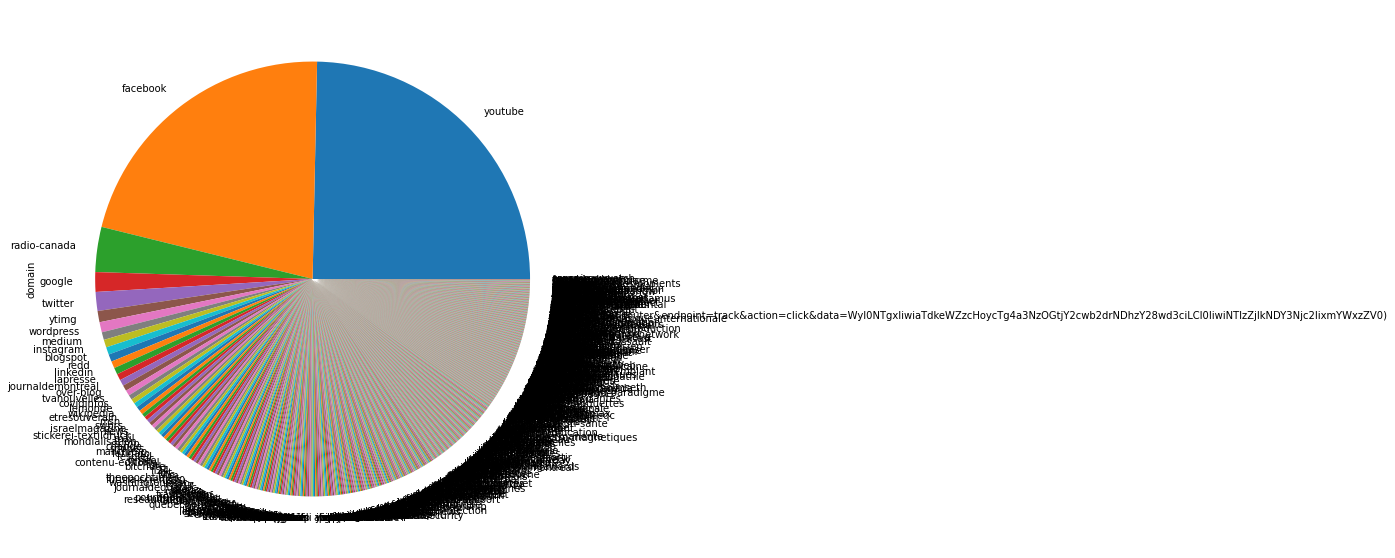

In [35]:
n_url = email_df.df.urls.explode()[email_df.df.domain.explode().apply(lambda x : x!='')].shape[0]
(email_df.df.domain.explode().value_counts().drop('')/n_url *100).plot(kind='pie', figsize=(10,10))


On split par groupe

In [36]:
def groupby_prop(val):
    group = 'inf015'
    if val >=20:
        group= 'sup20'
    elif val >=10 and val < 20:
        group = 'btw10_20'
    elif val >= 5 and val < 10:
        group = 'btw5_10'
    elif val >=1 and val <5:
        group = 'btw1_5'
    elif val >= 0.5 and val < 1:
        group = 'btw05_1'
    elif val >= 0.15 and val < 0.5:
        group = 'btw015_05'
    return group



In [37]:
data_dom = email_df.df.domain.explode()[email_df.df.domain.explode().apply(lambda x : x!='')]
data_dom = data_dom.value_counts() 
data_dom = pd.DataFrame(data_dom.values, index = data_dom.index, columns=['count']) #le nombre de courriel par domaine est converti en pd.DF
data_dom['prop'] = email_df.df.domain.explode().value_counts().drop('')/n_url * 100 # ajout des proportions
data_dom['prop_group'] = data_dom['prop'].apply(lambda x:groupby_prop(x)) # ajout des groupes a partir des proportions
num_dom = email_df.df.domain.explode().value_counts().drop('').shape[0] #retirer ceux qui sont null

(data_dom.groupby('prop_group').count()['prop']/num_dom * 100).to_clipboard()

In [38]:
data_dom

,count,prop,prop_group
youtube,1335,24.671965,sup20
facebook,1162,21.474774,sup20
radio-canada,181,3.345038,btw1_5
google,79,1.459989,btw1_5
twitter,76,1.404546,btw1_5
...,...,...,...
messenger,1,0.018481,inf015
over-blog-kiwi,1,0.018481,inf015
francoischarron,1,0.018481,inf015
conspiracywatch,1,0.018481,inf015


### Google Trends

In [39]:
g_trends = pd.read_csv(path_google_trends)

In [40]:
g_trends.set_index('date').stack().replace(0,np.nan).to_clipboard()

### Tableau mots theme

In [41]:
email_df.groupby_word_in_theme().to_clipboard()

In [42]:
theme_to_drop = ['regions', 'europe', 'usa', 'reste_du_monde']

In [47]:
email_df.groupby_word_in_theme().drop(theme_to_drop).to_clipboard()

In [46]:
email_df.groupby_word_in_theme().drop(theme_to_drop).loc['politique']

gouvernement    265
président        68
guerre           59
trudeau          20
ministre         59
autorités        55
legault          11
ministère        28
loi 61           16
pétition         33
politique        83
police           36
government       17
fédérale         17
fédéral          38
provincial       11
oms              47
dtype: int64